In [1]:
# 3-1 Accuracy(정확도)
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
            
        return pred


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy:{0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy:0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()

print(digits.data, digits.data.shape)
print()
print(digits.target, digits.target.shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64)

[0 1 2 ... 8 9 8] (1797,)


In [5]:
# bool을 int로 바꿔주면 0,1 로 다 바뀜
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
print(y_test.shape)
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test, fakepred))

(450,)
0    405
1     45
dtype: int64
0.9


In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)



array([[405,   0],
       [ 45,   0]], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('정밀도:', precision_score(y_test, fakepred))
print('재현율:', recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [10]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Precision/Recall Trade-off 
# (정밀도/재현율 간의 trade-off)

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape, pred_proba[:3])
print()
print(pred, pred.shape)
print()

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(pred_proba_result[:3])

(179, 2) [[0.46197701 0.53802299]
 [0.87868649 0.12131351]
 [0.87716331 0.12283669]]

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1] (179,)

[[0.46197701 0.53802299 1.        ]
 [0.87868649 0.12131351 0.        ]
 [0.87716331 0.12283669 0.        ]]


In [12]:
# Binarizer
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [13]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba_1[:3])

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


[[0.53802299]
 [0.12131351]
 [0.12283669]]
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [14]:
# 임계값을 0.5에서 0.4로 낮출 경우
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


In [15]:
# 테스트 수행할 모든 임계값 입력해보기
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)      


0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


In [16]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 shape:', thresholds.shape)
print('반환된 precision 배열의 shape:', precisions.shape)
print('반환된 recalls 배열의 shape:', recalls.shape)

print(thresholds[:5])
print(precisions[:5])
print(recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print(np.round(thresholds[thr_index], 2))
print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))


반환된 분류 결정 임계값 배열의 shape: (143,)
반환된 precision 배열의 shape: (144,)
반환된 recalls 배열의 shape: (144,)
[0.10390279 0.10390503 0.10393018 0.1078841  0.10887762]
[0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
[1.         0.98360656 0.98360656 0.98360656 0.96721311]
[0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
[0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
[1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


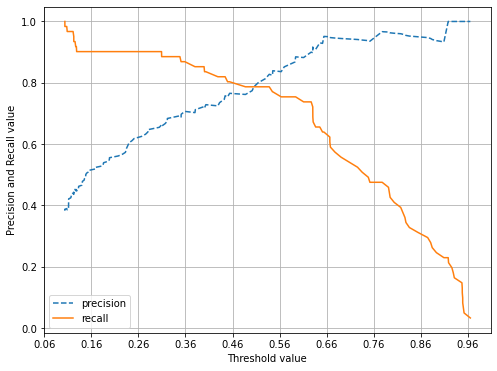

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def curve(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

curve(y_test, lr_clf.predict_proba(X_test)[:,1])

    

In [18]:
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict_proba(X_test)[:,1])
thresholds.shape[0]
print(thresholds.shape[0])

143


In [20]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 score:{0:.4f}'.format(f1))

F1 score:0.7805


In [22]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    print('정확도:{0}, 정밀도:{1}, 재현율:{2}, f1:{3}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
   

0.4
오차행렬
[[98 20]
 [10 51]]
정확도:0.8324022346368715, 정밀도:0.7183098591549296, 재현율:0.8360655737704918, f1:0.7727272727272727
0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8491620111731844, 정밀도:0.765625, 재현율:0.8032786885245902, f1:0.784
0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8491620111731844, 정밀도:0.7741935483870968, 재현율:0.7868852459016393, f1:0.7804878048780488
0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659217877094972, 정밀도:0.8363636363636363, 재현율:0.7540983606557377, f1:0.793103448275862
0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8770949720670391, 정밀도:0.8823529411764706, 재현율:0.7377049180327869, f1:0.8035714285714285


In [26]:
# ROC Curve & AUC
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
# print(pred_proba_class1[:3])

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

print(np.round(fprs[thr_index], 3))
print(np.round(tprs[thr_index], 3))



[ 0  5 10 15 20 25 30 35 40 45 50]
[1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
[0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
[0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


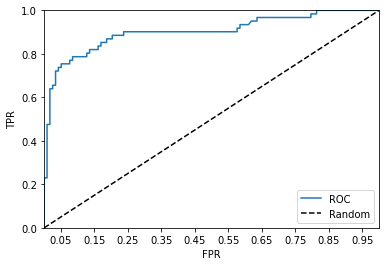

In [33]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR'); plt.ylabel('TPR')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [37]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('{0:.4f}'.format(roc_score))

0.9024


In [39]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

